## Imporing libraries

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))
from pysal.explore import esda

C:\Users\palmona1\anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
import pandas as pd
import geopandas as gpd
import pysal.lib as lps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import mapclassify

## Reading the shp file

In [4]:
df = gpd.read_file('MGN_DPTO_POLITICO.shp')

In [5]:
df.head(2)

,DPTO_CCDGO,DPTO_CNMBR,DPTO_NANO_,DPTO_CACTO,DPTO_NANO,Shape_Leng,Shape_Area,geometry
0,18,CAQUETÁ,1981,Ley 78 del 29 de Diciembre de 1981,2018,21.384287,7.318485,"POLYGON ((-74.89423 2.95852, -74.89410 2.95852..."
1,19,CAUCA,1857,15 de junio de 1857,2018,13.950263,2.534419,"POLYGON ((-76.45922 3.32872, -76.45878 3.32870..."


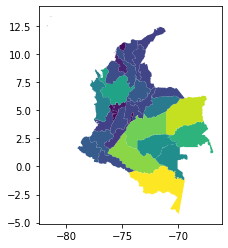

In [6]:
df.plot(column='Shape_Area')

## Reading the database with other important variables

In [7]:
data1 = pd.read_csv("dfModelo2019.csv")

C:\Users\palmona1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (58,83,84,91,96,98,100,102) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
data1.shape

(148011, 125)

In [11]:
data1.head(2)

,Unnamed: 0,estu_genero,estu_comocapacitoexamensb11,estu_horassemanatrabaja_x,estu_metodo_prgm,estu_snies_prgmacademico,fami_educacionmadre_x,fami_educacionpadre_x,inst_caracter_academico,estu_areareside_x,...,Edad,CodDpto,Dpto,Lat,Lon,Departamento,REGION,APROBACIÓN,DESERCIÓN,CODIGO_DEPARTAMENTO
0,0,F,Tomó un curso de preparación,Más de 30 horas,PRESENCIAL,53257,Primaria incompleta,Primaria completa,INSTITUCIÓN UNIVERSITARIA,AreaRural,...,29.0,76.0,Valle del Cauca,3.75,-76.5,VALLE,Región Pacífico,88.8383,3.9151,76.0
1,1,F,No realizó ninguna prueba de preparación,Más de 30 horas,PRESENCIAL,53257,Primaria incompleta,Secundaria (Bachillerato) incompleta,INSTITUCIÓN UNIVERSITARIA,CabeceraMunicipal,...,29.0,76.0,Valle del Cauca,3.75,-76.5,VALLE,Región Pacífico,88.8383,3.9151,76.0


## Grouping variables representing Colombian states

In [50]:
dfDptoSpacialM = data1.groupby("Departamento").agg({"Estudiantes": np.sum, 'mod_razona_cuantitat_punt': np.mean, 'mod_ingles_punt': np.mean, 'mod_competen_ciudada_punt': np.mean, 'mod_lectura_critica_punt': np.mean, 'punt_global_x': np.mean, 'estu_puesto': np.mean,'estu_prgm_academico': pd.Series.nunique,'estu_mcpio_reside_x': pd.Series.nunique, "APROBACIÓN": np.mean, "DESERCIÓN": np.mean, "Lat": np.mean, "Lon": np.mean})

In [13]:
dfDptoSpacialM.head()

,Estudiantes,mod_razona_cuantitat_punt,mod_ingles_punt,mod_competen_ciudada_punt,mod_lectura_critica_punt,punt_global_x,estu_puesto,estu_prgm_academico,estu_mcpio_reside_x,APROBACIÓN,DESERCIÓN
Departamento,,,,,,,,,,,
AMAZONAS,37,138.864865,142.027027,135.594595,139.945946,138.324324,405.054054,19,1,88.2338,4.1675
ANTIOQUIA,17435,153.888730,162.425367,150.097792,159.039748,154.546888,281.710544,286,123,88.3821,4.0247
ARAUCA,286,137.863636,133.583916,130.818182,132.097902,133.541958,446.276224,57,7,95.3138,4.0158
ATLANTICO,9436,145.941713,160.769345,143.001590,151.906634,149.188639,315.688425,153,23,92.9088,1.2646
BOGOTA,43470,157.923741,168.274077,154.454382,159.818841,158.140971,243.492670,410,1,97.5008,1.5954


In [14]:
data2=dfDptoSpacialM.reset_index()

## Verifying the completeness of the dataset

In [15]:
data2.Departamento

0            AMAZONAS
1           ANTIOQUIA
2              ARAUCA
3           ATLANTICO
4              BOGOTA
5             BOLIVAR
6              BOYACA
7              CALDAS
8             CAQUETA
9            CASANARE
10              CAUCA
11              CESAR
12              CHOCO
13            CORDOBA
14       CUNDINAMARCA
15            GUAINIA
16           GUAVIARE
17              HUILA
18         LA GUAJIRA
19          MAGDALENA
20               META
21             NARIÑO
22    NORTE SANTANDER
23           PUTUMAYO
24            QUINDIO
25          RISARALDA
26         SAN ANDRES
27          SANTANDER
28              SUCRE
29             TOLIMA
30              VALLE
31             VAUPES
32            VICHADA
Name: Departamento, dtype: object

## Standarizing the name of the states in order to merge the databases

In [16]:
  columns = ["DPTO_CNMBR"]
for i in columns:
    df[i] = df[i].str.replace('Á', 'A')
    df[i] = df[i].str.replace('É', 'E')
    df[i] = df[i].str.replace('Í', 'I')
    df[i] = df[i].str.replace('Ó', 'O')
    df[i] = df[i].str.replace('Ú', 'U')

In [17]:
df["DPTO_CNMBR"] = df["DPTO_CNMBR"].str.replace('ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA', 'SAN ANDRES')

In [18]:
df["DPTO_CNMBR"] = df["DPTO_CNMBR"].str.replace(', D.C.', '')

In [19]:
df["DPTO_CNMBR"] = df["DPTO_CNMBR"].str.replace('VALLE DEL CAUCA','VALLE')

In [20]:
df["DPTO_CNMBR"] = df["DPTO_CNMBR"].str.replace('NORTE DE SANTANDER','NORTE SANTANDER')

In [21]:
df.DPTO_CNMBR

0             CAQUETA
1               CAUCA
2            PUTUMAYO
3               VALLE
4             GUAINIA
5             VICHADA
6            CASANARE
7            AMAZONAS
8              VAUPES
9            GUAVIARE
10             CALDAS
11            QUINDIO
12          RISARALDA
13          ANTIOQUIA
14              CHOCO
15             NARIÑO
16            CORDOBA
17            BOLIVAR
18              CESAR
19         LA GUAJIRA
20          MAGDALENA
21              SUCRE
22         SAN ANDRES
23             ARAUCA
24             BOYACA
25       CUNDINAMARCA
26    NORTE SANTANDER
27             BOGOTA
28               META
29              HUILA
30          SANTANDER
31             TOLIMA
32          ATLANTICO
Name: DPTO_CNMBR, dtype: object

## Merging the databases

In [22]:
df_merge_col = pd.merge(df, data2, left_on='DPTO_CNMBR', right_on='Departamento')

In [23]:
df_merge_col.head(2)

,DPTO_CCDGO,DPTO_CNMBR,DPTO_NANO_,DPTO_CACTO,DPTO_NANO,Shape_Leng,Shape_Area,geometry,Departamento,Estudiantes,mod_razona_cuantitat_punt,mod_ingles_punt,mod_competen_ciudada_punt,mod_lectura_critica_punt,punt_global_x,estu_puesto,estu_prgm_academico,estu_mcpio_reside_x,APROBACIÓN,DESERCIÓN
0,18,CAQUETA,1981,Ley 78 del 29 de Diciembre de 1981,2018,21.384287,7.318485,"POLYGON ((-74.89423 2.95852, -74.89410 2.95852...",CAQUETA,838,136.668258,136.545455,133.789976,139.557279,136.508353,417.984487,54,12,92.6324,5.3201
1,19,CAUCA,1857,15 de junio de 1857,2018,13.950263,2.534419,"POLYGON ((-76.45922 3.32872, -76.45878 3.32870...",CAUCA,2708,142.838996,141.115712,137.078656,145.738183,141.970089,398.792222,124,41,90.6533,2.7822


## Making clusters of the colombian states taking as a references the skills of the higher education students

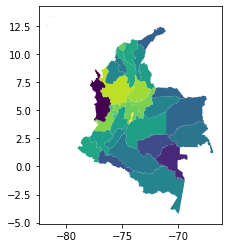

In [24]:
df_merge_col.plot(column='punt_global_x')

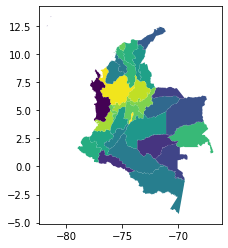

In [25]:
df_merge_col.plot(column='mod_lectura_critica_punt')

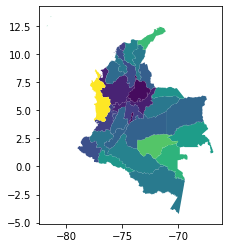

In [26]:
df_merge_col.plot(column='estu_puesto')

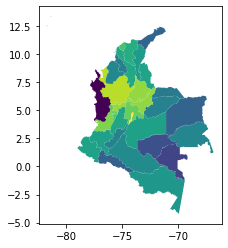

In [27]:
df_merge_col.plot(column='mod_competen_ciudada_punt')

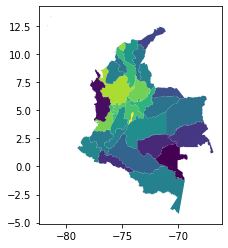

In [28]:
df_merge_col.plot(column='mod_ingles_punt')

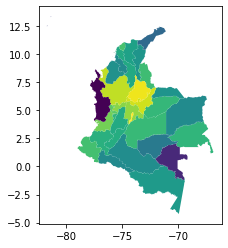

In [29]:
df_merge_col.plot(column='mod_razona_cuantitat_punt')

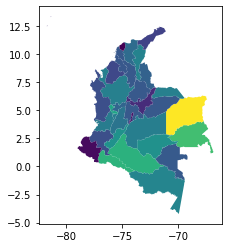

In [30]:
df_merge_col.plot(column='DESERCIÓN')

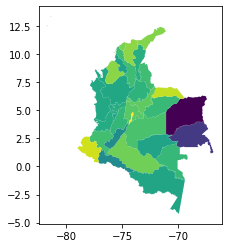

In [31]:
df_merge_col.plot(column='APROBACIÓN')

## Creating the spatial matrix and identifying neighborhoods

In [32]:
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

('WARNING: ', 22, ' is an island (no neighbors)')


C:\Users\palmona1\anaconda3\lib\site-packages\pysal\lib\weights\contiguity.py:184: UserWarning: There is one disconnected observation (no neighbors).
Island id: 22
  W.__init__(self, neighbors, ids=ids, **kw)


In [35]:
y = df_merge_col['punt_global_x']
ylag = lps.weights.lag_spatial(wq, y)

In [36]:
ylag

array([135.56080591, 140.6623546 , 140.00621641, 140.46818734,
       129.86797226, 135.95959467, 142.01371536, 131.26423399,
       135.18228266, 134.80355521, 149.23089913, 147.4121808 ,
       144.77461552, 143.92957537, 151.49570806, 136.69618421,
       145.09913833, 144.94714638, 143.01631476, 141.40477649,
       141.32131273, 141.25560413,   0.        , 140.89973083,
       145.56131219, 145.95872621, 147.73884764, 143.74800768,
       142.06614234, 145.16415986, 146.20241031, 147.11403199,
       143.70603768])

In [37]:
from pysal.viz import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)

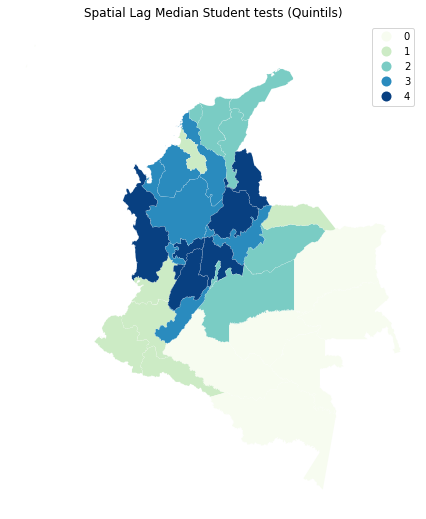

In [48]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Median Student tests (Quintils)")

plt.show()

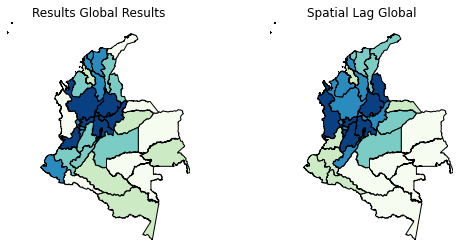

In [42]:
df_merge_col['lag_median_global'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4))
df_merge_col.plot(column='punt_global_x', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Results Global Results")
df_merge_col.plot(column='lag_median_global', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag Global")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

## Identifying groups of colombian states with 

In [43]:
y.median()

141.97008862629247

In [44]:
yb = y > y.median()
sum(yb)

16

In [46]:
yb = y > y.mean()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb] 
df['yb'] = yb

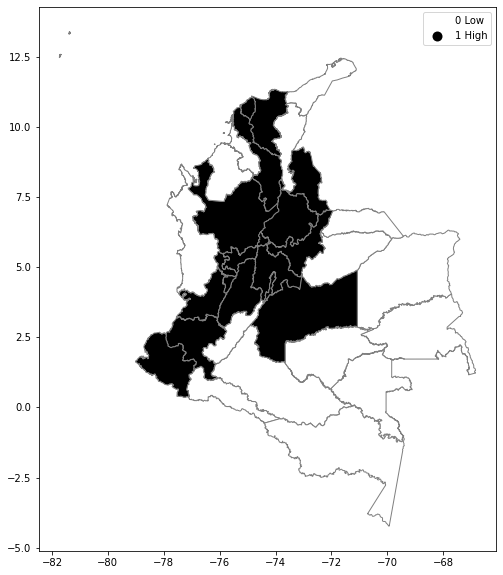

In [47]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

In [56]:
dfDptoSpacialM.to_csv("spatialdata.csv")